<a href="https://colab.research.google.com/github/amita-kapoor/Designing-Models-for-Responsible-AI/blob/main/Chapter6/H2o_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.5/177.5 MB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.38.0.4-py2.py3-none-any.whl size=177628739 sha256=c4c610b61aec16f4240762823482d0e8c7b4d72d2f1d193c87d3b12752c82a01
  Stored in directory: /root/.cache/pip/wheels/6b/1d/65/39927b5984bde22f615b4c6e9a8ee98ea4abf1acb5926623ff
Successfully built h2o


In [ ]:
from sklearn.datasets import make_circles
import pandas as pd
X, y = make_circles(n_samples=1000, noise=0.2, factor=0.5, random_state=9)
df = pd.DataFrame(X, columns=['x1','x2'])
df['y'] = y
df.head()
df.to_csv('circle.csv', index=False, header=True)

In [ ]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.17" 2022-10-18; OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu220.04); OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu220.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp9xm43j0j
  JVM stdout: /tmp/tmp9xm43j0j/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp9xm43j0j/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.4
H2O_cluster_version_age:,13 days
H2O_cluster_name:,H2O_from_python_unknownUser_xeydwu
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
class_df = h2o.import_file("circle.csv",\
                    destination_frame="circle_df")
class_df['y'] = class_df['y'].asfactor()

train_df,valid_df,test_df = class_df.split_frame(ratios=[0.6, 0.2],\
                   seed=133)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
from h2o.automl import H2OAutoML as AML
automl = AML(max_models = 13, max_runtime_secs=75, seed=27)
automl.train(training_frame= train_df, \
        validation_frame=valid_df, \
        y = 'y', x=['x1','x2'])

AutoML progress: |
17:35:26.145: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_1_AutoML_1_20230118_173526


Status of Neuron Layers: predicting y, 2-class classification, bernoulli distribution, CrossEntropy loss, 272 weights/biases, 7.7 KB, 6,774 training samples, mini-batch size 1
    layer    units    type       dropout    l1    l2    mean_rate              rate_rms               momentum    mean_weight           weight_rms           mean_bias               bias_rms
--  -------  -------  ---------  ---------  ----  ----  ---------------------  ---------------------  ----------  --------------------  -------------------  ----------------------  --------------------
    1        2        Input      0.0
    2        10       Rectifier  0.0        0.0   0.0   0.0013163808296667411  0.0006865884643048048  0.0         -0.10388239789754153  0.4854865074157715   0.4718710927310917      0.13052254915237427
    3        10       Rectifier  0.0        0.0   0.0   0.0029798737744567917  0.0033942870795726776  0.0         -0.02905706732883118  0.34122002124786377  0.9686788717231678      0.0810190737247467
    4        10       Rectifier  0.0        0.0   0.0   0.0017077698091452476  0.0015275543555617332  0.0         0.012515407255850732  0.3429756164550781   0.9943937793758313      0.033460721373558044
    5        2        Softmax               0.0   0.0   0.0018690149823669343  0.00152226397767663    0.0         0.3354018531739712    1.7272305488586426   -0.0023445244676465957  0.02658243477344513

ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.0912178565888484
RMSE: 0.3020229405009633
LogLoss: 0.294216178502135
Mean Per-Class Error: 0.11865989230501997
AUC: 0.9484920531526837
AUCPR: 0.9500862567888376
Gini: 0.8969841063053674

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6135832024448238
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      276  28   0.0921   (28.0/304.0)
1      44   259  0.1452   (44.0/303.0)
Total  320  287  0.1186   (72.0/607.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.613583     0.877966  176
max f2                       0.145035     0.916923  293
max f0point5                 0.752515     0.910147  142
max accuracy                 0.613583     0.881384  176
max precision                0.996397     1         0
max recall                   0.0131802    1         378
max specificity              0.996397     1         0
max absolute_mcc             0.613583     0.763809  176
max min_per_class_accuracy   0.577215     0.871287  190
max mean_per_class_accuracy  0.613583     0.88134   176
max tns                      0.996397     304       0
max fns                      0.996397     300       0
max fps                      0.00047241   304       399
max tps                      0.0131802    303       378
max tnr                      0.996397     1         0
max fnr                      0.996397     0.990099  0
max fpr                      0.00047241   1         399
max tpr                      0.0131802    1         378

Gains/Lift Table: Avg response rate: 49.92 %, avg score: 51.27 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0115321                   0.995897           2.0033    2.0033             1                0.996191    1                           0.996191            0.0231023       0.0231023             

In [ ]:
lb = automl.leaderboard

In [ ]:
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
DeepLearning_1_AutoML_1_20230118_173526,0.945637,0.310433,0.947609,0.121933,0.309363,0.0957056
StackedEnsemble_AllModels_1_AutoML_1_20230118_173526,0.944464,0.299924,0.941914,0.126862,0.301836,0.091105
StackedEnsemble_BestOfFamily_1_AutoML_1_20230118_173526,0.944226,0.300819,0.944967,0.125206,0.301052,0.090632
XGBoost_2_AutoML_1_20230118_173526,0.934884,0.3191,0.934649,0.121955,0.311347,0.0969369
XGBoost_3_AutoML_1_20230118_173526,0.934048,0.327493,0.934639,0.133468,0.317968,0.101104
GBM_2_AutoML_1_20230118_173526,0.927648,0.34992,0.919928,0.154812,0.330288,0.10909
GBM_3_AutoML_1_20230118_173526,0.924744,0.35712,0.914772,0.145025,0.334263,0.111732
GBM_4_AutoML_1_20230118_173526,0.922383,0.361861,0.91296,0.156473,0.336333,0.11312
DRF_1_AutoML_1_20230118_173526,0.920949,0.658926,0.926827,0.151538,0.331622,0.109973
XRT_1_AutoML_1_20230118_173526,0.920841,0.660853,0.929617,0.149997,0.33658,0.113286


## The below codes- refer to how AutoML can be used for Model Explainability


In [ ]:
preds = automl.leader.predict(test_df)

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## DeepLearning_1_AutoML_1_20230118_173526

,0,1,Error,Rate
0,104.0,10.0,0.0877,(10.0/114.0)
1,10.0,88.0,0.102,(10.0/98.0)
Total,114.0,98.0,0.0943,(20.0/212.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

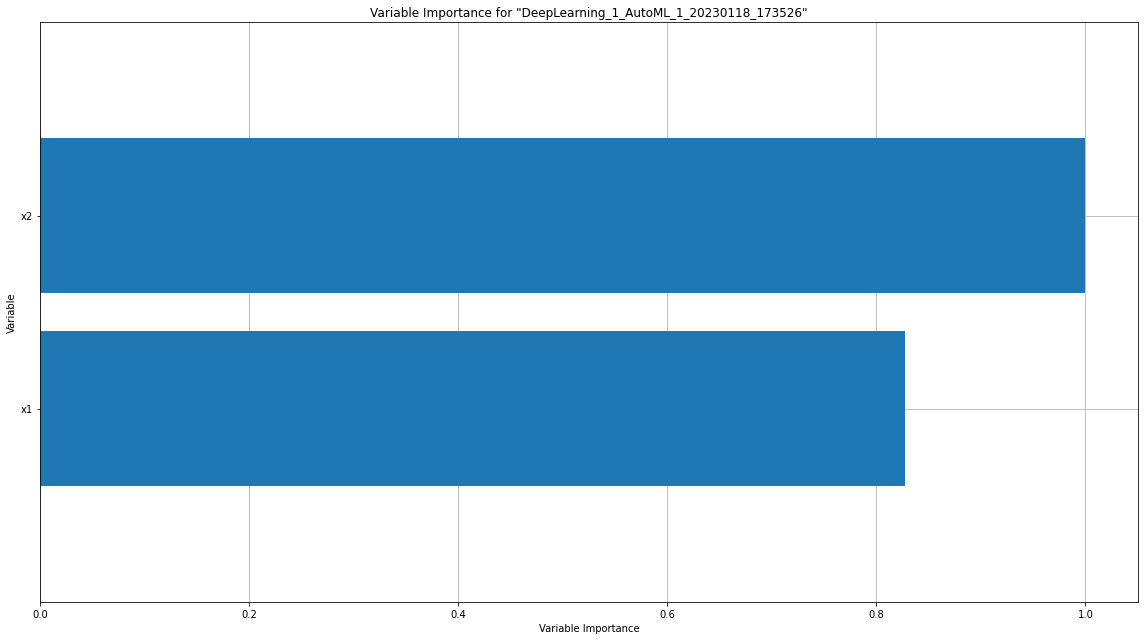

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

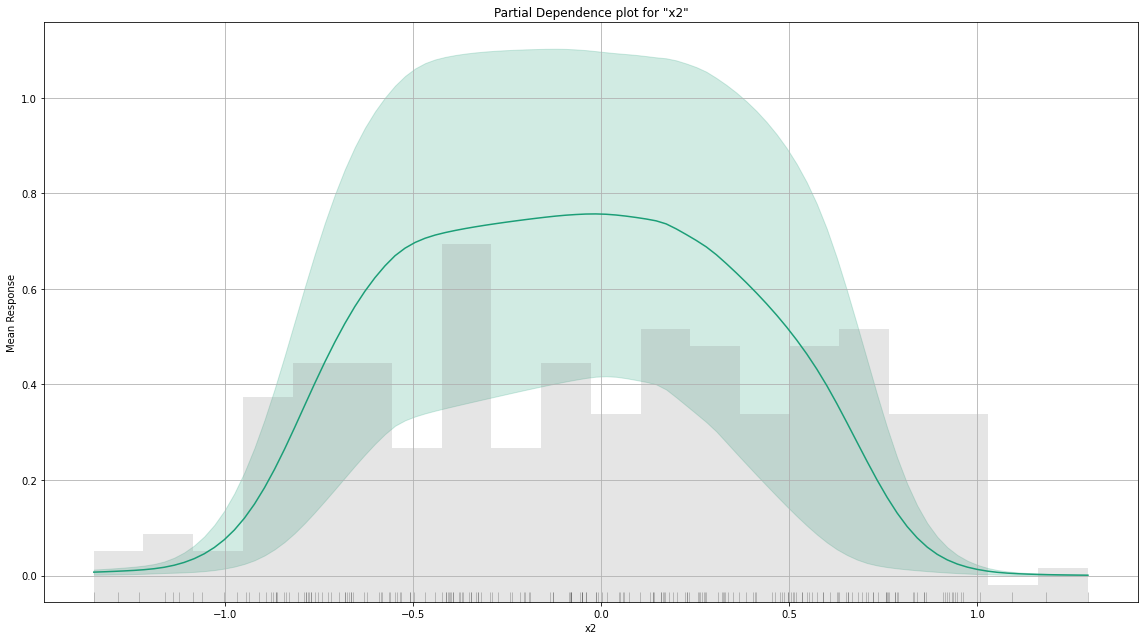

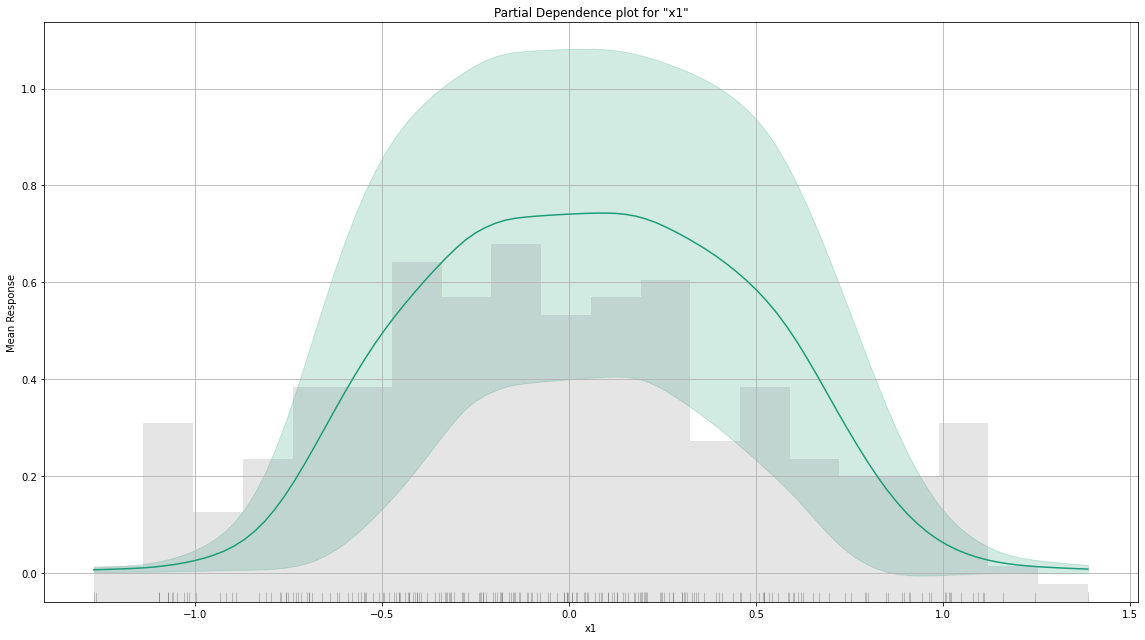

In [ ]:
exa = automl.leader.explain(test_df)

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_1_AutoML_1_20230118_173526,0.965002,0.241424,0.964743,0.0839599,0.271466,0.0736936,2471,0.14391,StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_1_20230118_173526,0.963749,0.243374,0.964118,0.084676,0.271559,0.0737445,2490,0.074133,StackedEnsemble
XGBoost_3_AutoML_1_20230118_173526,0.961198,0.256466,0.960476,0.094164,0.277711,0.0771231,354,0.024966,XGBoost
XGBoost_2_AutoML_1_20230118_173526,0.957304,0.263553,0.958521,0.105174,0.282922,0.0800448,964,0.02534,XGBoost
DeepLearning_1_AutoML_1_20230118_173526,0.957125,0.263737,0.958321,0.0948801,0.283068,0.0801276,171,0.060114,DeepLearning
XRT_1_AutoML_1_20230118_173526,0.955559,0.265272,0.953633,0.0984604,0.28188,0.0794564,349,0.044095,DRF
DRF_1_AutoML_1_20230118_173526,0.953947,0.267685,0.955091,0.113856,0.287595,0.0827111,856,0.043708,DRF
GBM_2_AutoML_1_20230118_173526,0.950412,0.290542,0.946705,0.121285,0.296958,0.0881843,589,0.045224,GBM
GBM_3_AutoML_1_20230118_173526,0.947547,0.294359,0.943206,0.121285,0.300167,0.0901003,567,0.045734,GBM
GBM_4_AutoML_1_20230118_173526,0.946115,0.308576,0.940792,0.119048,0.304487,0.0927123,451,0.062098,GBM


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## DeepLearning_1_AutoML_1_20230118_173526

,0,1,Error,Rate
0,104.0,10.0,0.0877,(10.0/114.0)
1,10.0,88.0,0.102,(10.0/98.0)
Total,114.0,98.0,0.0943,(20.0/212.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

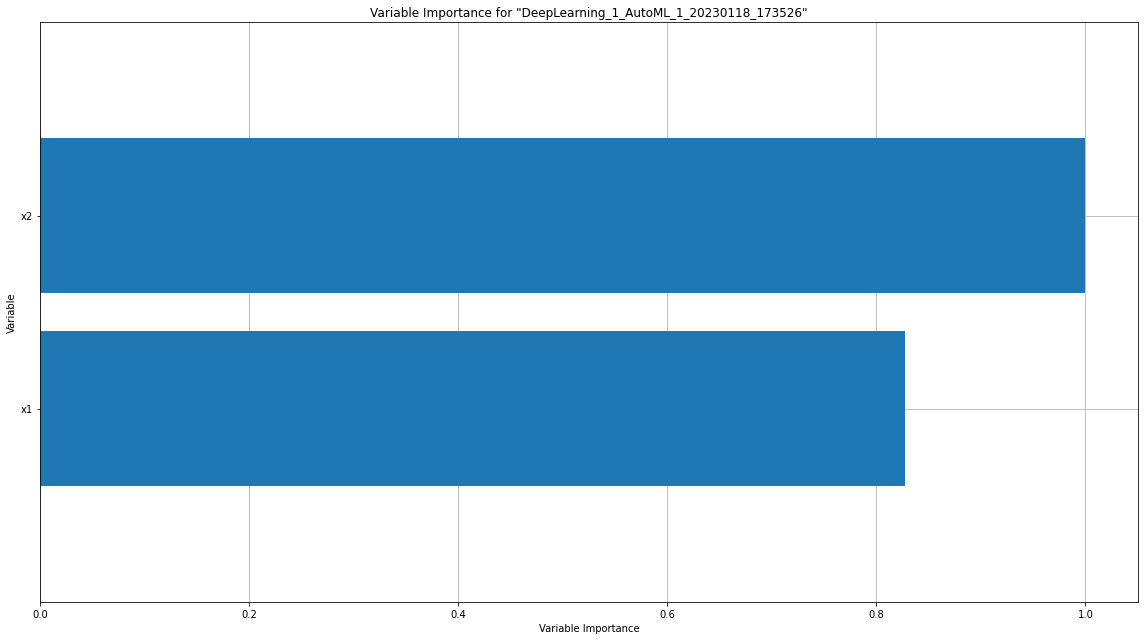

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

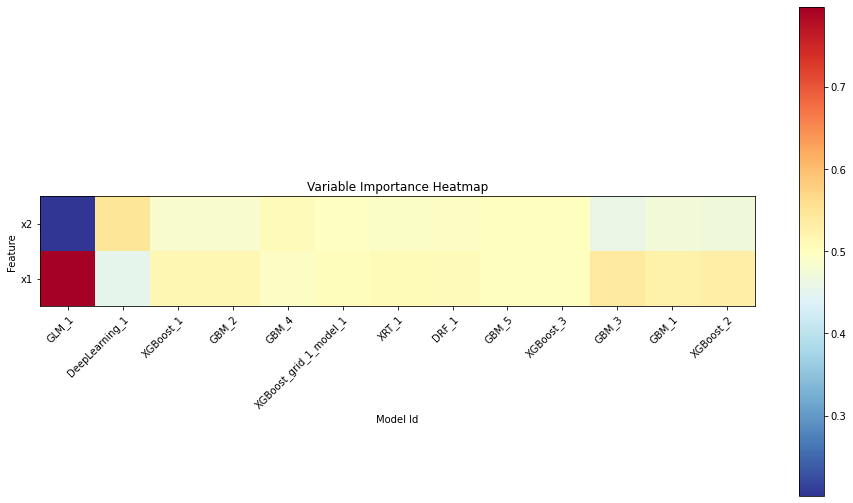

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

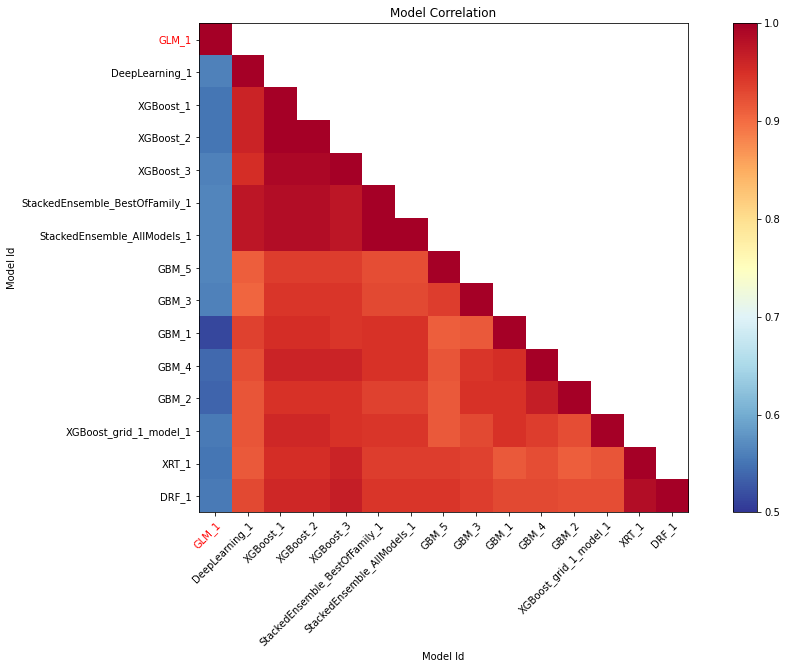

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

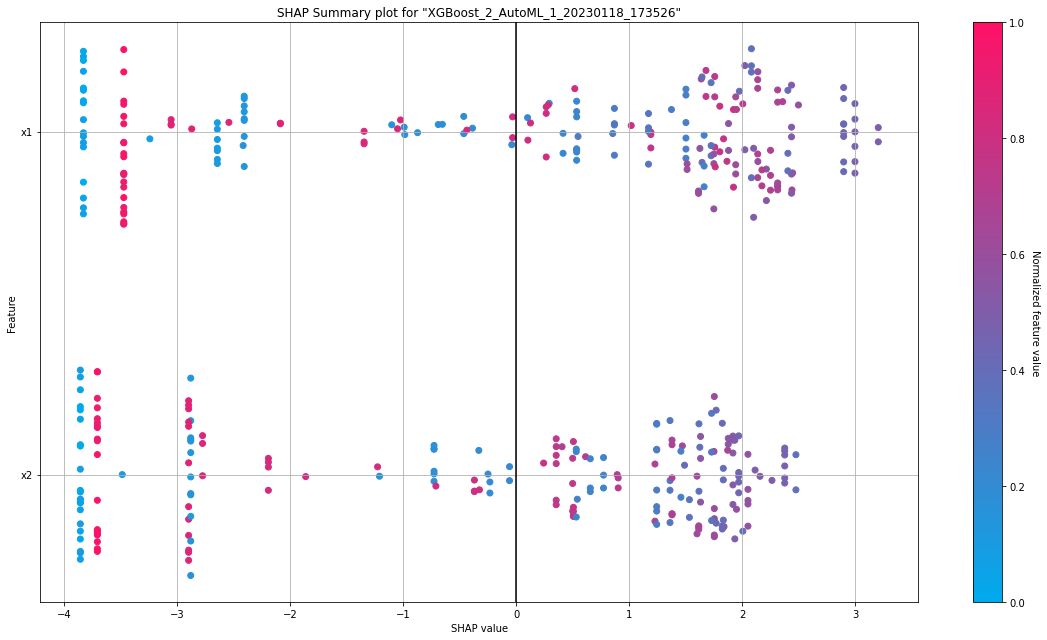

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

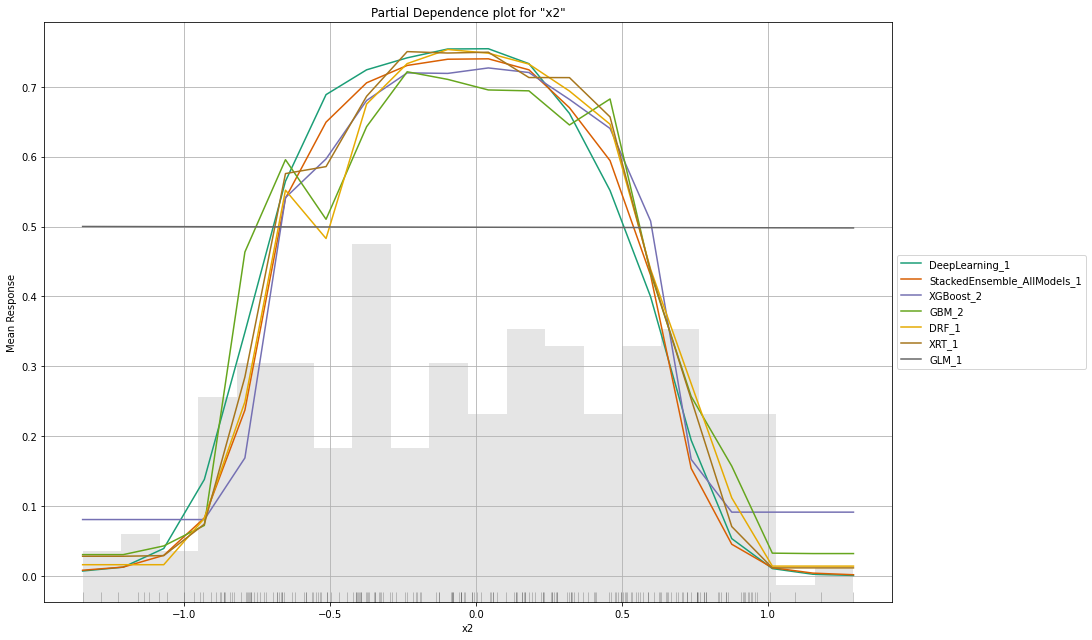

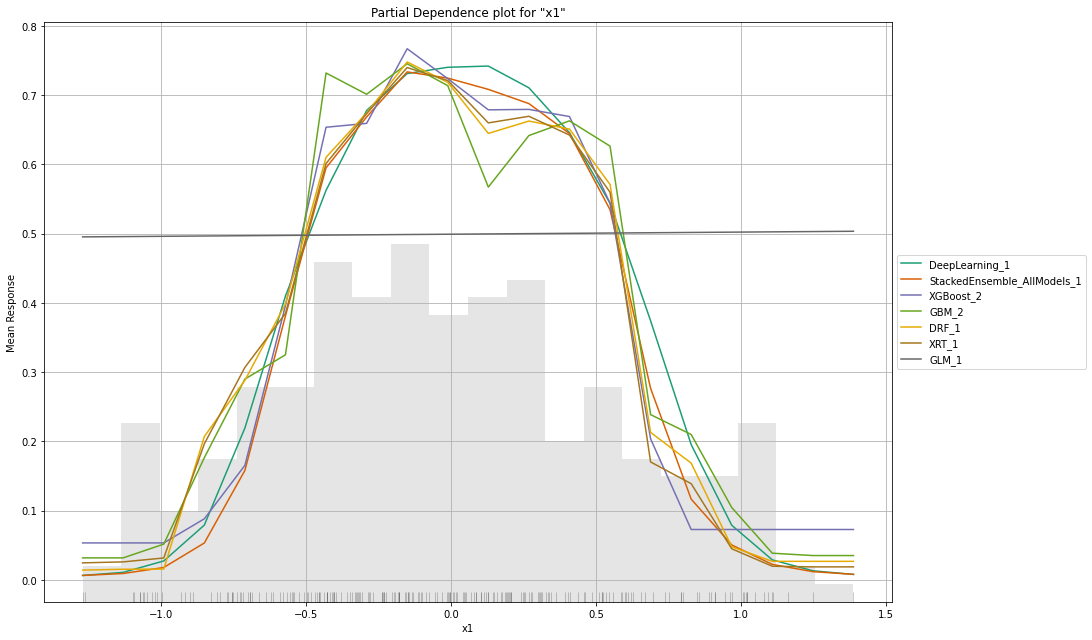

In [ ]:
exa = automl.explain(test_df)